#The Finite Square Well Potential

One of the most useful potentials to study is the finite square well. While it still has unphysical boundaries that change with infinite slope, its finite depth is a good approximation to many real-life physics problems such as: electrons trapped between layers of semi-conductors and nucleons in an atomic nucleus. We will explore this potential in what follows using, John C. Morrison's book "[Modern Physics for Scientists and Engineers](http://store.elsevier.com/Modern-Physics/John-Morrison/isbn-9780128007341/)" as a guide.



Importing libraries for later use.

In [1]:
from numpy import linspace, array,zeros,arange,append,nan
from scipy import linalg, tan,sqrt, pi,cos,sin,exp
from scipy import optimize
import matplotlib.pyplot as plt
from IPython.display import Latex
from IPython.html.widgets import interactive
from IPython.html.widgets import FloatSliderWidget, IntSliderWidget
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


#Setting up the potential

In [2]:
def U_sq(x, args):
    """
    finite square well potential
    """
    u=zeros(len(x))
    width = args['width']
    depth = args['depth']
    for i in range(len(x)):
        if x[i]<=-width/2 or x[i]>=width/2:
            u[i]=Vo
        

    return u

##Filling in the physical parameters.
Watch units!

In [3]:
L=10 #well width in nm
Vo=1 #Well depth in eV
m=.067 #mass in electron masses

args = {'width': L, 'depth': Vo}
x=linspace(-2*L/2, 2*L/2,400)
U=U_sq(x,args)


##Plotting the potential

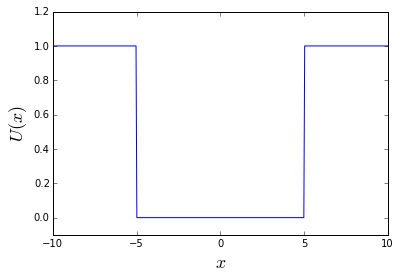

In [4]:
fig, ax=plt.subplots()

ax.plot(x,U)

ax.set_ylim(-.1,Vo*1.2)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$U(x)$', fontsize=18);

# Theory

Above we see what the potential looks like. Pretty much like we promised--square and finite. As we will see, the depth and width of this potential will tell us how many solutions we can expect.

As we do for potentials, we find solutions inside and outside the potential and we "stitch" the answers together via the boundary conditions.

The Schrodinger Equation for inside of the well, where $V(x)=0$ is given by

$$
-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}=E\psi \text{ for } -L/2\leq x\leq L/2.
$$

We can simplify the notation by introducing the wavenumber $k=\sqrt{\frac{2mE}{\hbar^2}}$ and Schrodinger's Equation becomes

$$
\frac{d^2\psi}{dx^2}+k^2\psi=0
$$

Outside the well, where $V(x)=V_o$, we have:

$$
\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V_o\psi=E\psi, \text{ for } |x| \geq L/2 
$$

We can once again make a simplification by introducing the decay constant (the reason for this identifcation will become clear later) $$\kappa=\left(\frac{2m(V_o-E}{\hbar^2}\right)^{1/2}$$ In the range of $x$ we are considering in this part of the derivation, $V_o-E$ is always positive and $\kappa$ is real. Schrodinger's Equation becomes
$$ \frac{d^2\psi}{dx^2}-k^2\psi=0$$

For now we will only consider the bound solutions, so for the region inside of the well, we can see by inspection that the solutions separate into even and odd solutions. That is solutions that obey even and odd symmetry across $x=0$ (If we had shifted the well with respect to the origin, we would have gotten the same energies, but the solutions wouldn't be separated so nicely).

##Even solutions

By inspection we see that a bound solution to the Schrodinger Equation inside of the well is
$$ \psi(x)=A\cos(kx), -L/2 \leq x \leq L/2$$

and the solution outside of the well is

$$\psi(x)=B e^{\mp\kappa x}$$ where the minus sign is for $x>L/2$ and the plus sign is for $x<L/2$. These choices of sign will ensure we can normalize the final wavefunction.

We now use the boundary conditions to get the energies of the bound states. 

The wavefunction needs to be continuous at $x=L/2$ which leads to:
$$ A\cos(kL/2)=Be^{-\kappa L/2}$$

The first derivative of the wavefunction also needs to be continuous at $x=L/2$
$$ -Ak\sin(kL/2)=-B\kappa e^{-\kappa L/2}$$

Dividing these two equations will eliminate the constants and we get

$$\tan(kL/2)=\frac{\kappa}{k}$$

Replacing $\kappa$ on the RHS

$$\tan(kL/2)=\sqrt{\frac{2mV_o}{\hbar^2 k^2}-\frac{2mE}{\hbar^2 k^2}}$$

and now replacing $k$ on the RHS

$$\tan(kL/2)=\sqrt{\frac{2mV_o}{\hbar^2 k^2}-1}$$

We now want to solve for $k$ to get the energy, however, this is a trancedental equation and can't be solved explicitly! So let's make two changes of variable to make the notation simpler. $\theta=kL/2$ and $\theta_0=\frac{mV_oL^2}{2\hbar^2}$ With that the trancedental equation becomes:

$$\tan\theta=\sqrt{\frac{\theta_o^2}{\theta^2}-1}$$

We will solve this in two ways: 1) plotting the LHS of the above equation and the RHS of the equation as functions of $\theta$. Where these cross are the solutions we are looking for.

##Odd solutions
Before continuing, let us state the odd solutions inside of the well.
$$ \psi(x)=A\sin(kx), -L/2 \leq x \leq L/2$$
The solutions outside of the well are similar and imposing the boundary conditions as before leads to the following trancedental equation:
$$-\cot\theta=\sqrt{\frac{\theta_o^2}{\theta^2}-1}$$






In [5]:
#Given our physical parameters above, calculate theta_o
theta0=sqrt(m*9.31e-31*Vo*L*L/(2*(6.58e-16)**2*1e18*1.6e-19))

#Graphical Method

As was written above, a fairly quick way on a computer to solve for $\theta$ is to plot the LHS and the RHS of the solutions on the same graph. Where the graphs intersect are solutions to the problem. By zooming in on the graph, it is easy to get a fairly quick and accurate set of solutions.

In [6]:
def squareWellGraphicalSolution(t0=theta0):
    """
    
    """
    utol=10        #utol and ltol are upper and lower limits to avoid the discontinuities
    ltol=-10       #of tan and cot
    
    theta=linspace(0.001,1.05*t0,400)
    
    fig, axes = plt.subplots(1, 1)
    y1=tan(theta)
    y2=-1/tan(theta)
   
    y=sqrt((t0/theta)**2-1)
    #replace all numbers greater or less than utol and ltol with NotANumber(nan) so 
    #they don't show up in the graph
    y2[y2>utol] = nan
    y2[y2<ltol] = -nan
    y1[y1>utol] = nan
    y1[y1<ltol] = -nan
    y[y>utol] = nan
    y[y<ltol] = -nan
    
    axes.plot(theta,y,label=r'$\sqrt{\frac{\theta_0^2}{\theta^2}-1}$')
    axes.axvline(t0)
    axes.plot(theta,y1,label='Even')
    axes.plot(theta,y2,label='Odd')
    axes.legend()
    axes.set_ylim(-1,10)
    return theta0

Below you can change the slider to different values of $\theta_o$. One thing to notice is that no matter how small $\theta_o$ there is always one even, bound solution. There does not have to be an odd solution as well. What does it mean to decrease $\theta_o$? $\theta_o$ gets smaller when the well gets shallower ($V_o$ decreases) or narrower ($L$ decreases). As $\theta_o$ gets smaller fewer and fewer states exist, but as we wrote, there is always one that remains no matter how small $\theta_o$ gets.

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: invalid value encountered in less
//anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


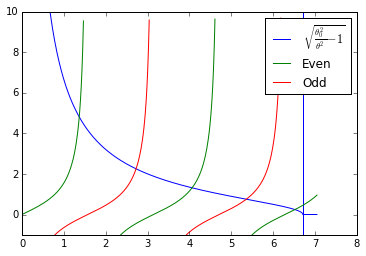

In [7]:
y=interactive(squareWellGraphicalSolution,theta0=(.01,10))
display(y)


#Numerical Solution

The graphical method has a lot going for it, but since we are using a computer already to plot solutions, we may as well use the computer to find numerical solutions. The procedure is as follows: define two functions that correspond to the even and odd solutions as follows.

$$y(\theta)=\tan(kL/2)-\sqrt{\frac{2mV_o}{\hbar^2 k^2}-1}=0$$

where we brought everything over to one side. The goal is to now find where the zero crossings fo this function are and those are our solutions. Scipy as a lot of built in routines for doing this, so we do not need to reinvent the wheel. We will be using the [optimize.brentq](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.brentq.html) algorithm which is a stable and accurate algorithm for finding zeros. The only problem that we have is that we need to know roughly where the zeros are. The function requires two values that bracket the zero. But we don't know where the zeros are! We get around this problem by picking a $\theta$ and calculating $y(\theta)$, then increase $\theta$ by a little and calculate $y(\theta+step)$. Multiply these two together. If the product is positive, then the two $\theta$s are on the same side of the zero. If their product is negative, then we know we have bracketed the zero and we can send $\theta$ and $\theta+step$ to the brentq algorithm.

In [8]:
#define our difference equations for the even and odd solutions
def even_sol(x,theta0):
    #theta0=5.71
    y1=tan(x)   
    
    y=sqrt((theta0/x)**2-1)
    return(y-y1)
def odd_sol(x,theta0):
    #theta0=5.71 
    y2=-1/tan(x)
    y=sqrt((theta0/x)**2-1)
    return(y-y2)

In [9]:
def sqWellSol(theta0,step):
    
    esol=array([],dtype=float) #array to store even solutions 
    osol=array([],dtype=float)  #array to store odd solutions
    inc=arange(step,theta0,step) #array of "x"s to find solutions
    
    even=True #We know even and odd solutions alternate starting with the evens so switch even 
                #flag to False after an even solution is found so routine knows to next search
                #for odd solutions, then repeat.
            
    for i in range(len(inc)-1):
        if even==True:
            if even_sol(inc[i],theta0)*even_sol(inc[i+1],theta0)<0: #have we bracketed a zero?
                
                #yes? then find it. Important! optimize.brentq expects the function it is finding
                #the zero of to only take "x" values, anything else, like theta0 gets sent in
                #as args.
                                                                            
                esol=append(esol,optimize.brentq(even_sol,inc[i],inc[i+1],args=theta0) ) 
                even=False
        if even==False:
            if odd_sol(inc[i],theta0)*odd_sol(inc[i+1],theta0)<0:
                
                
                osol=append(osol,optimize.brentq(odd_sol,inc[i],inc[i+1],args=theta0))
                
                even=True
    

    return esol,osol



#Wave functions

Now that we have the energy solutions we can stitch together the wave function solutions. We are not going to normalize the solutions for our purposes, but we will use the boundary conditions to correctly stitch the solutions together.


In [10]:
etheta,otheta=sqWellSol(theta0,.1) #calling the zeros with a step size of 0.1, which is adequate 
                                    # for most theta0, perhaps a deep or broad well would
                                    #have so many states a finer step size would be required

#Converting theta solutions into wavenumbers, decay constants, and Energies

ek=etheta*2./L # even k in nm^-1 
ok=otheta*2/L #odd k in nm^-1
ekap=2*etheta/L*tan(etheta) #even kappa in nm^-1
okap=abs(2*otheta/L*tan(otheta)) #odd kappa in nm^-1
e_eng=2*(1.05457173e-34)**2*etheta**2/(m*9.31e-31*(L*1e-9)**2)/1.6e-19 #even energy in eV
o_eng=2*(1.05457173e-34)**2*otheta**2/(m*9.31e-31*(L*1e-9)**2)/1.6e-19 #odd energy in eV


In [11]:
#stitching the wave functions together

def even_wave(x,Vo,ek,ekap,L):
    A=Vo/20. #arbitrary value of integration constant A to make fit on the graph
    B=A*(cos(ek*L/2))/exp(-ekap*L/2) #Getting the right B to make the solutions join up
    
    wave=zeros(len(x))
    for i in range(len(x)):
        if x[i]<=-L/2:
            wave[i]=B*exp(ekap*x[i])
        elif x[i]>=L/2:
            wave[i]=B*exp(-ekap*x[i])
        else:
            wave[i]=A*cos(ek*x[i])
    return wave

def odd_wave(x,Vo,ok,okap,L):
    A=Vo/20. #arbitrary value of integration constant A to make fit on the graph
    B=A*(sin(ok*L/2))/exp(-okap*L/2) #Getting the right B to make the solutions join up
    
    wave=zeros(len(x))
    for i in range(len(x)):
        if x[i]<=-L/2:
            wave[i]=B*exp(okap*x[i])
        elif x[i]>=L/2:
            wave[i]=-B*exp(-okap*x[i])
        else:
            wave[i]=-A*sin(ok*x[i])
    return wave

#Plotting it all
Below we plot the wavefunctions offset by their energy, so we can see how the wavefunctions change as a function of energy. As in the infinite square well and all bound states, the higher the energy the more oscillitory the wavefunction. We also can see why we called $\kappa$ the decay constant. Classically a particle can't exist in regions where $E-V_o<0$, however a wave can, but the probability has to decay away pretty quickly. This behavior is analogous to evanescent waves in optics http://nbviewer.ipython.org/github/HartwickChaosLab/Physics-IPython-Notebooks/blob/master/Optics-NB/Fresnel-Relations.ipynb

The higher the energy of the particle the more it can penetrate into the "forbidden" region. Also as in optics, if we placed another quantum well close to the first, the possibility of tunneling occurs and a particle can get across the forbidden energy barrier. Applications of this using a finite square well include [multiple quantum well lasers](http://www.tf.uni-kiel.de/matwis/amat/semi_en/kap_5/backbone/r5_4_1.html) and in the [Kroenig-Penny Model](https://en.wikipedia.org/wiki/Particle_in_a_one-dimensional_lattice#Kronig.E2.80.93Penney_model) of conduction in metals. [Tunneling](https://en.wikipedia.org/wiki/Quantum_tunnelling) is also important in [Scanning Tunneling Microscopes](https://en.wikipedia.org/wiki/Scanning_tunneling_microscope), [in radioactive decay](https://en.wikipedia.org/wiki/Radioactive_decay) and [tunnel diodes](https://en.wikipedia.org/wiki/Tunnel_diode) to name just a few.

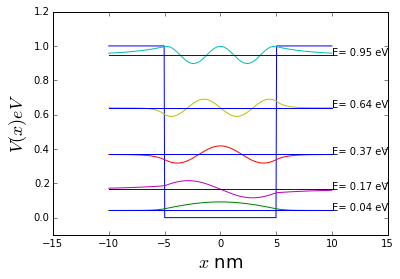

In [12]:
fig, ax=plt.subplots()

ax.plot(x,U)
for i in range(len(ek)):
    ax.plot(x,e_eng[i]+even_wave(x,Vo,ek[i],ekap[i],L))
    ax.axhline(y=e_eng[i],xmin=.1666, xmax=.8333)
    ax.annotate('E= %3.2f eV'%e_eng[i], xy=(x[-1],e_eng[i] ),  xycoords='data')
for i in range(len(ok)):
    ax.plot(x,o_eng[i]+odd_wave(x,Vo,ok[i],okap[i],L))
    ax.axhline(y=o_eng[i],xmin=.1666, xmax=.8333)
    ax.annotate('E= %3.2f eV'%o_eng[i], xy=(x[-1],o_eng[i] ),  xycoords='data')
    
ax.set_ylim(-.1*Vo,Vo*1.2)
ax.set_xlim(-3*L/2,3*L/2)
ax.set_xlabel(r'$x$ nm', fontsize=18)
ax.set_ylabel(r'$V(x) eV $', fontsize=18);